**Exploratory Data Analysis of E-Commerce Sales and Profitability**

*Goal:* To perform Exploratory Data Analysis (EDA) on an e-commerce dataset, identifying key factors such as discounts, shipping costs, order priorities, and product categories that influence sales and profit. The project aimed to uncover patterns and correlations to help optimize business strategies and improve decision-making based on data-driven insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading data
df=pd.read_csv("E-commerce Dataset.csv")
df.head(2)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

* The dataset contains 51,290 rows and 16 columns.
* Some columns have missing values, such as 'Aging', 'Sales', 'Quantity', ]Discount', 'Shipping_Cost', & 'Order_Priority'.
* The 'Order_Date' column is currently in object type, which needs to be converted to datetime.

In [5]:
#Converting the string date to datetime object
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors = "coerce")
print(df['Order_Date'].dtype)

datetime64[ns]


In [6]:
df.describe()

,Order_Date,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51290,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,2018-07-23 11:27:05.720413184,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
min,2018-01-01 00:00:00,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,2018-05-07 00:00:00,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,2018-07-28 00:00:00,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,2018-10-17 00:00:00,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,2018-12-30 00:00:00,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000
std,NaN,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745


* The dataset contains key numerical columns like 'Aging', 'Sales', 'Quantity', 'Discount', 'Profit', and 'Shipping_Cost'.
* 'Order_Date' ranges from January 1, 2018 to December 30, 2018, with the average date being July 23, 2018.
* 'Aging' has an average of 5.26 days, with values ranging from 1 to 10.5 days.
* 'Sales' has an average value of 152.34, with a minimum of 33 and a maximum of 250.
* 'Quantity' averages at 2.5 items per order, with a minimum of 1 and maximum of 5.
* 'Discount' averages 30.38%, ranging from 10% to 50%.
* 'Profit' averages at 70.41, with values between 0.50 and 167.50.
* 'Shipping_Cost' averages 7.04, ranging from 0.10 to 16.80.

In [8]:
#Checking null values
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

* There null values in Aging, Sales, Quantity, Discount, Shipping_Cost, Order_Priority column.
* Numerical missing values can be filled with either mean or median using fillna() function.
* Categorical missing values can be imputed with mode using fillna() or replace null with "Unknown".

In [10]:
#Treating nulls
df['Aging'] = df['Aging'].fillna(df['Aging'].mean())
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())
df['Shipping_Cost'] = df['Shipping_Cost'].fillna(df['Shipping_Cost'].mean())
df['Order_Priority'] = df['Order_Priority'].fillna(df['Order_Priority'].mode()[0])

In [11]:
#Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


**EDA - Exploratory Data Analysis**

In [13]:
login_types = df['Customer_Login_type'].unique()
login_type_orders = df.groupby('Customer_Login_type')['Sales'].sum().sort_values(ascending=False)

print("Types of logins:", login_types)
print("Login type with the number of sales:", login_type_orders)

Types of logins: ['Member' 'Guest' 'New ' 'First SignUp']
Login type with the number of sales: Customer_Login_type
Member          7.475239e+06
Guest           3.078950e+05
First SignUp    2.574700e+04
New             4.682000e+03
Name: Sales, dtype: float64


* There are 4 types of customer logins - Member, Guest, New and Frist_Signup.
* Majority of sales is driven by customers who are already a *member* of the E-commerce website, while the customer who are signing up fr the frist time and new are driving less sales.

In [59]:
df['Gender'].value_counts()
#df['Gender'].value_counts(normalize=True) * 100

Gender
Male      28138
Female    23152
Name: count, dtype: int64

* Majority of orders are placed by male than female. 
* 55% orders are placed by Mlae and 45% are placed by female.

In [63]:
df['Device_Type'].value_counts(normalize=True) * 100

Device_Type
Web       92.868005
Mobile     7.131995
Name: proportion, dtype: float64

Majority of orders are placed through desktop than mobile. 93% orders are placed through through web and only 7% orders are placed through mobile.

In [19]:
print(df['Product_Category'].value_counts())

Product_Category
Fashion               25646
Home & Furniture      15438
Auto & Accessories     7505
Electronic             2701
Name: count, dtype: int64


Category with highest number of orders is Fashion and lowest is Electronic.

In [21]:
print(df['Payment_method'].value_counts())

Payment_method
credit_card    38137
money_order     9629
e_wallet        2789
debit_card       734
not_defined        1
Name: count, dtype: int64


* Maority of payments have come through credit_card. This can be due to the perceived convenience, security, and rewards offered by credit card providers.
* However, payments through debit_card are very low compared to other payment methods.

In [23]:
# Extract year, month, and day of the week from 'Order_Date'
df['Month'] = df['Order_Date'].dt.month
df.groupby('Month')['Sales'].sum().round(1)

#df['Day_of_Week'] = df['Order_Date'].dt.day_name()

Month
1     379627.0
2     332495.0
3     435502.0
4     597312.0
5     824654.3
6     642555.0
7     810205.0
8     664495.0
9     738303.0
10    743387.0
11    877881.0
12    767147.0
Name: Sales, dtype: float64

* Sales are highest in November at 877,881 and lowest in February at 332,495.
* There is an overall increase in sales as the year progresses, with a noticeable spike towards the end of the year.

In [25]:
#Top 5 profitable produtcs
df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(5)

Product
T - Shirts       340720.6
Titak watch      296718.2
Running Shoes    289097.6
Jeans            276856.3
Formal Shoes     265350.7
Name: Profit, dtype: float64

In [26]:
#Top 5 Less-profitable produtcs
df.groupby('Product')['Profit'].sum().sort_values(ascending=False).tail(5)

Product
LCD             6197.2
Mixer/Juicer    5033.3
Mouse           4632.8
Watch           3428.5
Keyboard        3292.4
Name: Profit, dtype: float64

In [27]:
#Top 5 customers with maxium sales
df.groupby('Customer_Id')['Sales'].sum().sort_values(ascending=False).head(5)

Customer_Id
87989    994.0
35324    949.0
79016    935.0
10436    929.0
51093    927.0
Name: Sales, dtype: float64

In [28]:
#Creating revenue column
df['Revenue'] = df['Sales'] * df['Quantity']

In [29]:
df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)

Product_Category
Fashion               1.129888e+07
Home & Furniture      4.892455e+06
Auto & Accessories    2.576910e+06
Electronic            8.681780e+05
Name: Revenue, dtype: float64

Highest revenue generating product_category is Fashion and lowest is Electronic

In [31]:
#Average Sales generated by gender
avg_Sales = df.groupby('Gender')['Sales'].mean().sort_values(ascending=False).round(2)
avg_Profit = df.groupby('Gender')['Profit'].mean().sort_values(ascending=False).round(2)

gender_summary = pd.DataFrame({'avg_sales': avg_Sales, 'avg_profit': avg_Profit})
print(gender_summary)

        avg_sales  avg_profit
Gender                       
Male       153.14       70.75
Female     151.37       69.99


* The average Sales for Male customers is 153.14, while for Female customers, it is slightly lower at 151.37.
* The average Profit for Male customers is 70.75, while for Female customers, it is 69.99.
* This shows that there is a minor difference in sales and profit between male and female customers, with male customers generating slightly higher average sales and profit.

In [33]:
df['Delivery Duration'] = np.where((df['Aging'] >=0) & (df['Aging'] <= 3), '0-3 Days',
np.where((df['Aging'] >=4) & (df['Aging'] <= 7), '4-7 Days',
np.where((df['Aging'] >=8) & (df['Aging'] <= 10), '8-10 Days', '10+ Days')))

In [34]:
print(df['Delivery Duration'].value_counts())

Delivery Duration
4-7 Days     19606
0-3 Days     17299
8-10 Days    14384
10+ Days         1
Name: count, dtype: int64


The majority of deliveries happen within a week (0-7 days), but nearly one-third of orders (8-10 days) take longer, which could indicate potential bottlenecks in shipping or processing.

**Visualization**

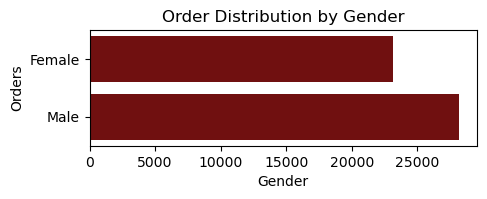

In [37]:
plt.figure(figsize=(5,1.5))
sns.countplot(y=df['Gender'], color ='maroon')
plt.title("Order Distribution by Gender")  
plt.xlabel("Gender")  
plt.ylabel("Orders")  
plt.show() 

Majority of orders were placed by male.

<Axes: xlabel='Month', ylabel='Sales'>

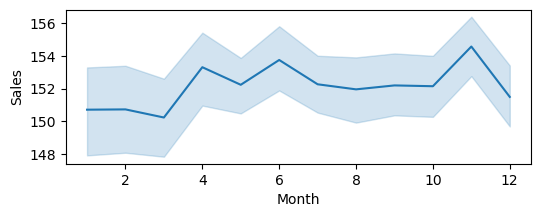

In [39]:
plt.figure(figsize=(6,2))
sns.lineplot(data=df,x=df['Month'],y=df['Sales'])

Sales show a gradual increase towards the end of the year, peaking in the last few months. This trend suggests a higher consumer demand during year-end.

Text(0.5, 0, 'Quantity')

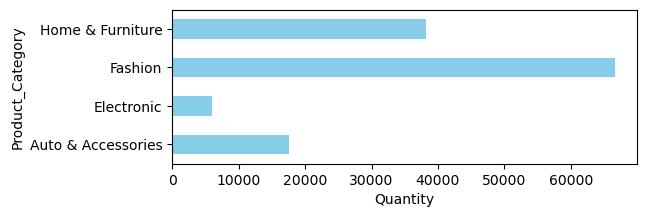

In [41]:
df.groupby('Product_Category')['Quantity'].sum().plot(kind='barh', color='skyblue', figsize=(6, 2))
plt.xlabel("Quantity")

Fashion category has the hightest quantity ordered followed by Home & Furniture wHile Electronic quantity is ordered less

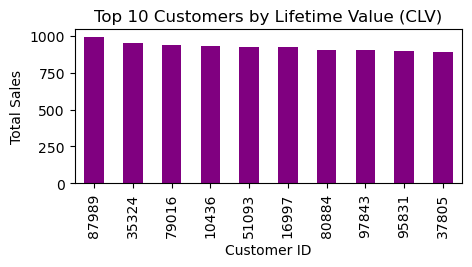

In [141]:
clv = df.groupby('Customer_Id')['Sales'].sum().sort_values(ascending=False)
clv.head(10).plot(kind='bar', color='purple', figsize=(5, 2))
plt.title('Top 10 Customers by Lifetime Value (CLV)')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()

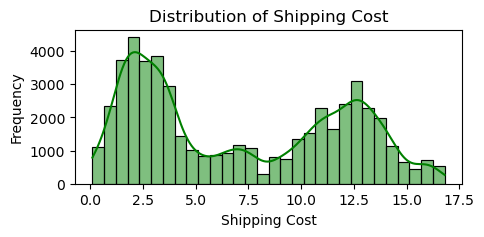

In [149]:
plt.figure(figsize=(5, 2))
sns.histplot(df['Shipping_Cost'], bins=30, kde=True, color='green')
plt.title('Distribution of Shipping Cost')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.show()

Most of the shipping costs are between 2 to 3.5 and 11 to 13, with fewer instances outside these ranges.

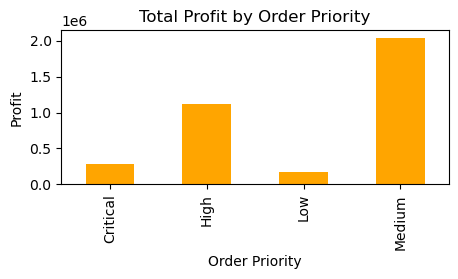

In [159]:
profit_by_priority = df.groupby('Order_Priority')['Profit'].sum()
profit_by_priority.plot(kind='bar', color='orange', figsize=(5, 2))
plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Profit')
plt.show()

Medium Priority orders generate higher profits than High Priority orders, suggesting customers may prefer a balance between cost and speed for faster delivery.

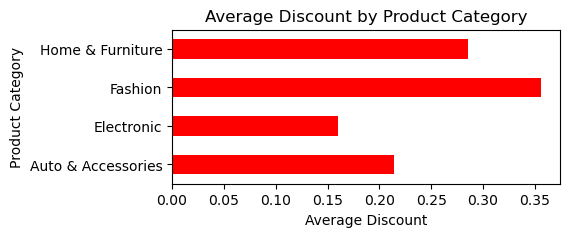

Average profit by Product_Category
Auto & Accessories    64.532072
Electronic            64.491151
Fashion               80.816654
Home & Furniture      57.006018
Name: Profit, dtype: float64


In [189]:
avg_discount_by_category = df.groupby('Product_Category')['Discount'].mean()
avg_discount_by_category.plot(kind='barh', color='red', figsize=(5, 2))
plt.title('Average Discount by Product Category')
plt.xlabel('Average Discount')
plt.ylabel('Product Category')
plt.show()

avg_profit_by_category = df.groupby('Product_Category')['Profit'].mean()
print(f"Average profit by {avg_profit_by_category}")

* Fashion has the highest profit and also offers the most discounts, followed by Home & Furniture and Auto & Accessories.
* This suggests that the higher discount in Fashion may be contributing to its higher profit.

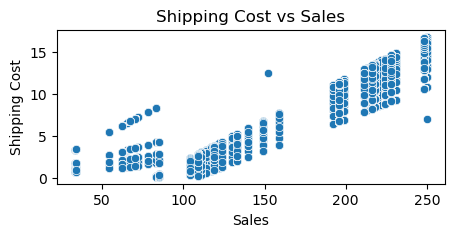

Correlation between Shipping Cost and Sales: 0.9164695859238432


In [187]:
plt.figure(figsize=(5, 2))
sns.scatterplot(x=df['Sales'], y=df['Shipping_Cost'])
plt.title('Shipping Cost vs Sales')
plt.xlabel('Sales')
plt.ylabel('Shipping Cost')
plt.show()

correlation = df['Shipping_Cost'].corr(df['Sales'])
print(f"Correlation between Shipping Cost and Sales: {correlation}")

The correlation between Shipping Cost and Sales is **0.92**, which is a **strong positive correlation**. This indicates that as shipping costs increase, sales tend to increase as well. It confirms that higher shipping costs are likely associated with larger or more expensive orders, supporting your observation of a linear relationship between the two variables.

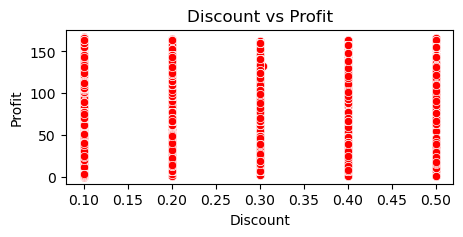

Correlation between Discount and Profit: -0.003204108224954757


In [133]:
plt.figure(figsize=(5, 2))
sns.scatterplot(x=df['Discount'], y=df['Profit'], color='red')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

correlation_discount_profit = df['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Profit: {correlation_discount_profit}")

The correlation between Discount and Profit is **-0.003**, which is very close to zero. This indicates that discounts have little to no effect on profit, meaning offering discounts doesn't significantly impact profit in this dataset.

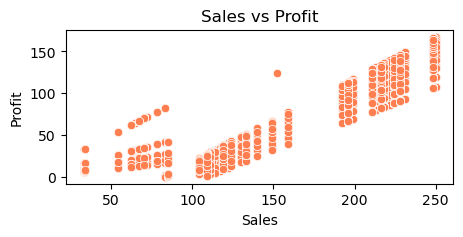

Correlation between Sales and Profit: 0.9167505365429739


In [135]:
plt.figure(figsize=(5, 2))
sns.scatterplot(x=df['Sales'], y=df['Profit'], color='coral')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Correlation coefficient
correlation = df['Sales'].corr(df['Profit'])
print(f'Correlation between Sales and Profit: {correlation}')

The correlation between Sales and Profit is **0.92**, which indicates a **strong positive correlation**. This means that as sales increase, profit also tends to increase significantly.

**Hypothesis: 1**

* Null Hypothesis (H₀): There is no significant relationship between Discounts and Sales or Discounts and Profit.
* Alternative Hypothesis (H₁): Higher Discounts are significantly correlated with higher Sales and/or lower Profit.

In [201]:
from scipy.stats import pearsonr

# Test the correlation between Discount and Sales
corr_discount_sales, p_value_sales = pearsonr(df['Discount'], df['Sales'])
print(f'Correlation between Discount and Sales: {corr_discount_sales}, p-value: {p_value_sales}')

# Test the correlation between Discount and Profit
corr_discount_profit, p_value_profit = pearsonr(df['Discount'], df['Profit'])
print(f'Correlation between Discount and Profit: {corr_discount_profit}, p-value: {p_value_profit}')

Correlation between Discount and Sales: 0.07257961903361039, p-value: 7.27292277881672e-61
Correlation between Discount and Profit: -0.0032041082249547187, p-value: 0.46806682682904915


*Discounts and Sales:* There is a weak positive relationship between discounts and sales. While discounts may slightly increase sales, the effect is minimal.

*Discounts and Profit:* There is no significant relationship between discounts and profit. Changes in discounts do not appear to have an impact on profitability.

**Hypothesis: 2**

* Null Hypothesis (H₀): Shipping Costs do not significantly impact Profit
* Alternative Hypothesis (H₁): Higher Shipping Costs result in lower profits.

In [225]:
from scipy.stats import spearmanr

# Spearman correlation test between Shipping Costs and Profit
corr_shipping_profit, p_value_shipping_profit = spearmanr(df['Shipping_Cost'], df['Profit'])
print(f'Spearman Correlation between Shipping Cost and Profit: {corr_shipping_profit}, p-value: {p_value_shipping_profit}')

Spearman Correlation between Shipping Cost and Profit: 0.9999167330881202, p-value: 0.0


There is a very strong positive relationship between Shipping Cost and Profit. As Shipping Cost increases, Profit also increases, suggesting that higher shipping costs are linked to higher profits.